In [1]:
from annotator import Annotator
from graph_density import Label_Metrics
import graphs as gr
import networkx as nx
import numpy as np
import pandas as pd

annotator1 = Annotator('annotator1', "annotations-TBikaun.json")
annotator2 = Annotator('annotator2', "annotations-ziyu.zhao.json")
annotator3 = Annotator('annotator3', "annotations-danielsantosa.json")
annotator4 = Annotator('annotator4', "annotations-mhodki.json")
annotator5 = Annotator('annotator5', "annotations-mstewartuwa.json")
annotator6 = Annotator('annotator6', "annotations-caitlinwoods.json")
annotator7 = Annotator('annotator7', "annotations-Tim.json")
label = Label_Metrics(annotator1, annotator2, annotator3, annotator6)

In [2]:
overall_table = label.get_accumulated_table()
# pd.set_option('display.max_rows', None)
pivoted_table = label.pivot_dataframe(overall_table)
agreement_graph = Label_Metrics.create_agreement_graph(pivoted_table)
# Calculate the graph density
graph_density = Label_Metrics.custom_graph_density(agreement_graph)

Edge count: 145


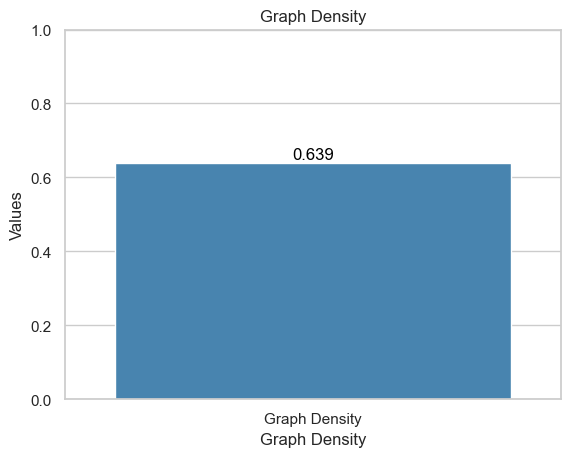

In [3]:
gr.create_bar_chart(graph_density, "Graph Density", "Values","Graph Density")